In [1]:
cd ~/Desktop/Tesis/Notebooks-Git

/home/luis/Desktop/Tesis/Notebooks-Git


In [2]:
import Script as sc

# Stick&Slip analysis

In [3]:
cd ~/Desktop/Tesis/Notebooks-Git/Training/StickSlip

/home/luis/Desktop/Tesis/Notebooks-Git/Training/StickSlip


In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

In [5]:
df = pd.read_csv("/home/luis/Desktop/Tesis/Notebooks-Git/Training/TrainingV1_Incl.csv")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10893 entries, 0 to 10892
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BPOS      10893 non-null  float64
 1   BVEL      10893 non-null  float64
 2   DEPT      10893 non-null  float64
 3   DateTime  10893 non-null  object 
 4   GR        10835 non-null  float64
 5   HKLD      10893 non-null  float64
 6   ROP5      10610 non-null  float64
 7   RPM       10893 non-null  float64
 8   Run       10893 non-null  object 
 9   SPPA      10893 non-null  float64
 10  SWOB      10893 non-null  float64
 11  Stick_RT  10893 non-null  float64
 12  TFLO      10893 non-null  float64
 13  TQA       10893 non-null  float64
 14  Well      10893 non-null  object 
 15  azi       10893 non-null  float64
 16  dispEw    10893 non-null  float64
 17  dispNs    10893 non-null  float64
 18  dls       10893 non-null  float64
 19  incl      10893 non-null  float64
 20  tvd       10893 non-null  fl

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
BPOS,10893.0,22.119667,11.196383,-1.457400,14.992600,22.500000,30.293200,50.142800
BVEL,10893.0,1.928094,7.054841,-44.915400,0.000600,0.002800,0.008100,55.346300
DEPT,10893.0,2793.129716,989.609160,210.000000,2297.000000,3140.000000,3500.000000,5300.000000
GR,10835.0,47.935541,54.559587,0.000000,6.552950,30.030600,72.606200,1111.850800
HKLD,10893.0,130.628518,17.839046,66.544000,125.521900,132.281600,139.283100,176.215700
ROP5,10610.0,15.305833,15.387170,0.726100,3.944900,10.037200,24.279500,270.099700
RPM,10893.0,155.361058,37.801758,29.000000,140.000000,168.000000,177.000000,262.000000
SPPA,10893.0,196.229974,35.900430,1.301400,184.208100,191.781900,222.877000,284.440200
SWOB,10893.0,6.487377,4.439813,-10.908700,3.600600,5.970000,8.251000,24.070000
Stick_RT,10893.0,48.770036,63.240049,0.000000,12.000000,27.000000,60.000000,381.000000


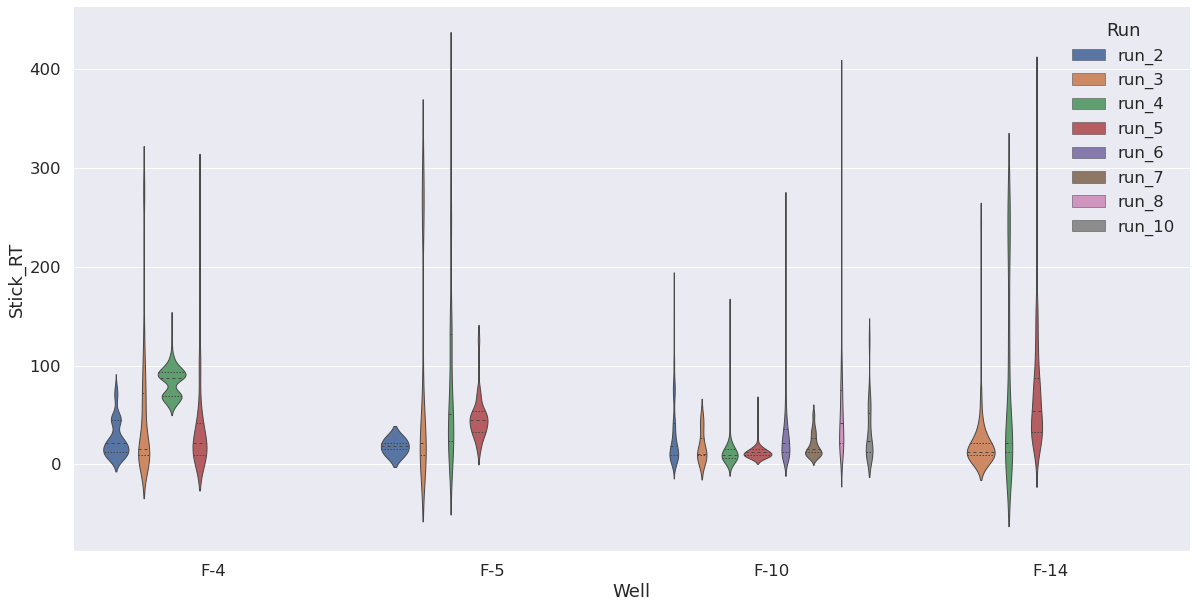

In [8]:
sns.set(font_scale=1.5)
plt.figure(figsize=(20,10))
sns.violinplot(data=(df.drop(["DateTime"],axis=1)), x="Well", y="Stick_RT", hue="Run",inner="quart", linewidth=1)
sns.despine(left=True)

## Section identifier per well

In [20]:
df_f10 = df[df["Well"]=="F-10"]

In [21]:
Runs = df_f10["Run"].tolist()
sections = []
for element in Runs:
    if element == "run_2":
        v = '26"' #Double check 
    elif (element == "run_3") or (element == "run_4"):
        v = '17 1/2"'
    elif (element == "run_5") or (element == "run_6") or (element == "run_7"):
        v = '12 1/4"'
    elif (element == "run_8") or (element == "run_9") or (element == "run_10"):
        v = '8 1/2"'
    sections.append(v)

In [22]:
df_f10["Sections"] = sections

<ipython-input-22-b10f3f0edfa5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f10["Sections"] = sections


In [9]:
df_f4 = df[df["Well"]=="F-4"]

In [10]:
Runs = df_f4["Run"].tolist()
sections = []
for element in Runs:
    if element == "run_2":
        v = '17 1/2"' 
    elif element == "run_3":
        v = '12 1/4"'
    elif (element == "run_4") or (element == "run_5"):
        v = '8 1/2"'
    sections.append(v)

In [11]:
df_f4["Sections"] = sections

<ipython-input-11-eb8c15972f62>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f4["Sections"] = sections


In [12]:
df_f5 = df[df["Well"]=="F-5"]

In [13]:
Runs = df_f5["Run"].tolist()
sections = []
for element in Runs:
    if element == "run_2":
        v = '17 1/2"'
    elif element == "run_3":
        v = '12 1/4"'
    elif (element == "run_4") or (element == "run_5"):
        v = '8 1/2"'
    sections.append(v)

In [14]:
df_f5["Sections"] = sections

<ipython-input-14-ed1f17070074>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f5["Sections"] = sections


In [15]:
df_f14 = df[df["Well"]=="F-14"]

In [16]:
Runs = df_f14["Run"].tolist()
sections = []
for element in Runs:
    if element == "run_3":
        v = '17 1/2"'
    elif element == "run_4":
        v = '12 1/4"'
    elif element == "run_5":
        v = '8 1/2"'
    sections.append(v)

In [17]:
df_f14["Sections"] = sections

<ipython-input-17-7a1eed7a32cb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f14["Sections"] = sections


In [24]:
frames = [df_f4,df_f5,df_f10,df_f14]
df_mod = pd.concat(frames)

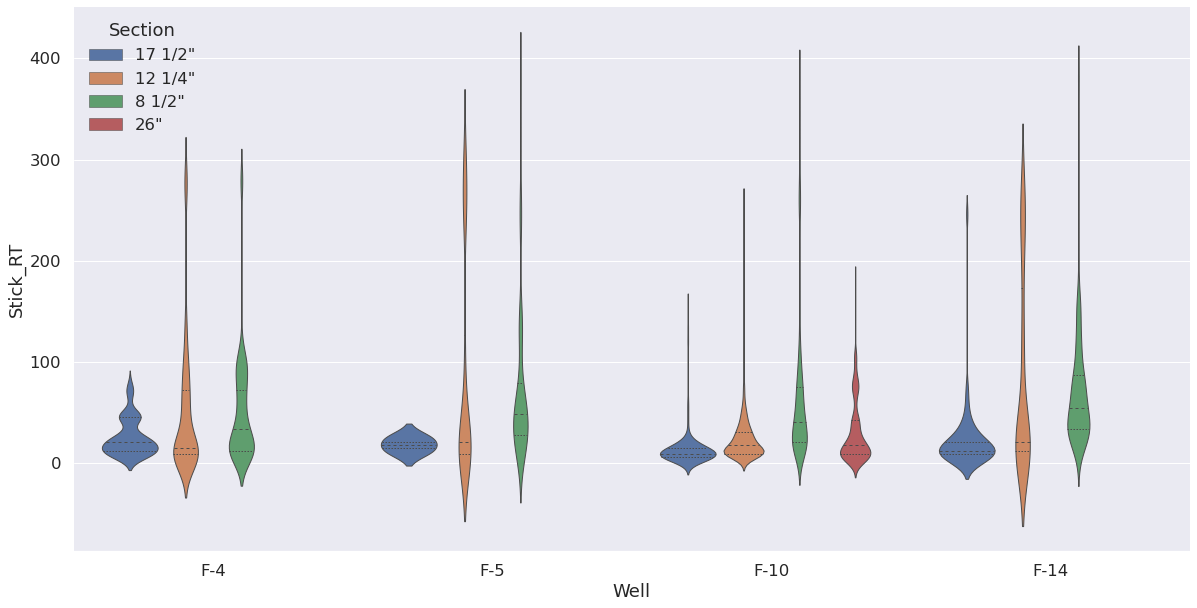

In [25]:
sns.set(font_scale=1.5)
plt.figure(figsize=(20,10))
sns.violinplot(data=(df_mod.drop(["DateTime"],axis=1)), x="Well", y="Stick_RT", hue="Sections",inner="quart", linewidth=1)
plt.legend(loc="upper left",title="Section")
sns.despine(left=True)

## Stick & Slip Severity 

In [26]:
df_ss = sc.ss_severity(df_mod)

In [27]:
df_ss.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10893 entries, 0 to 10892
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   BPOS                10893 non-null  float64
 1   BVEL                10893 non-null  float64
 2   DEPT                10893 non-null  float64
 3   DateTime            10893 non-null  object 
 4   GR                  10835 non-null  float64
 5   HKLD                10893 non-null  float64
 6   ROP5                10610 non-null  float64
 7   RPM                 10893 non-null  float64
 8   Run                 10893 non-null  object 
 9   SPPA                10893 non-null  float64
 10  SWOB                10893 non-null  float64
 11  Stick_RT            10893 non-null  float64
 12  TFLO                10893 non-null  float64
 13  TQA                 10893 non-null  float64
 14  Well                10893 non-null  object 
 15  azi                 10893 non-null  float64
 16  disp

In [42]:
["ss_categorical_txt"].unique()

array(['Medium', 'High', 'Severe'], dtype=object)

CPU times: user 29.6 s, sys: 270 ms, total: 29.9 s
Wall time: 30.4 s


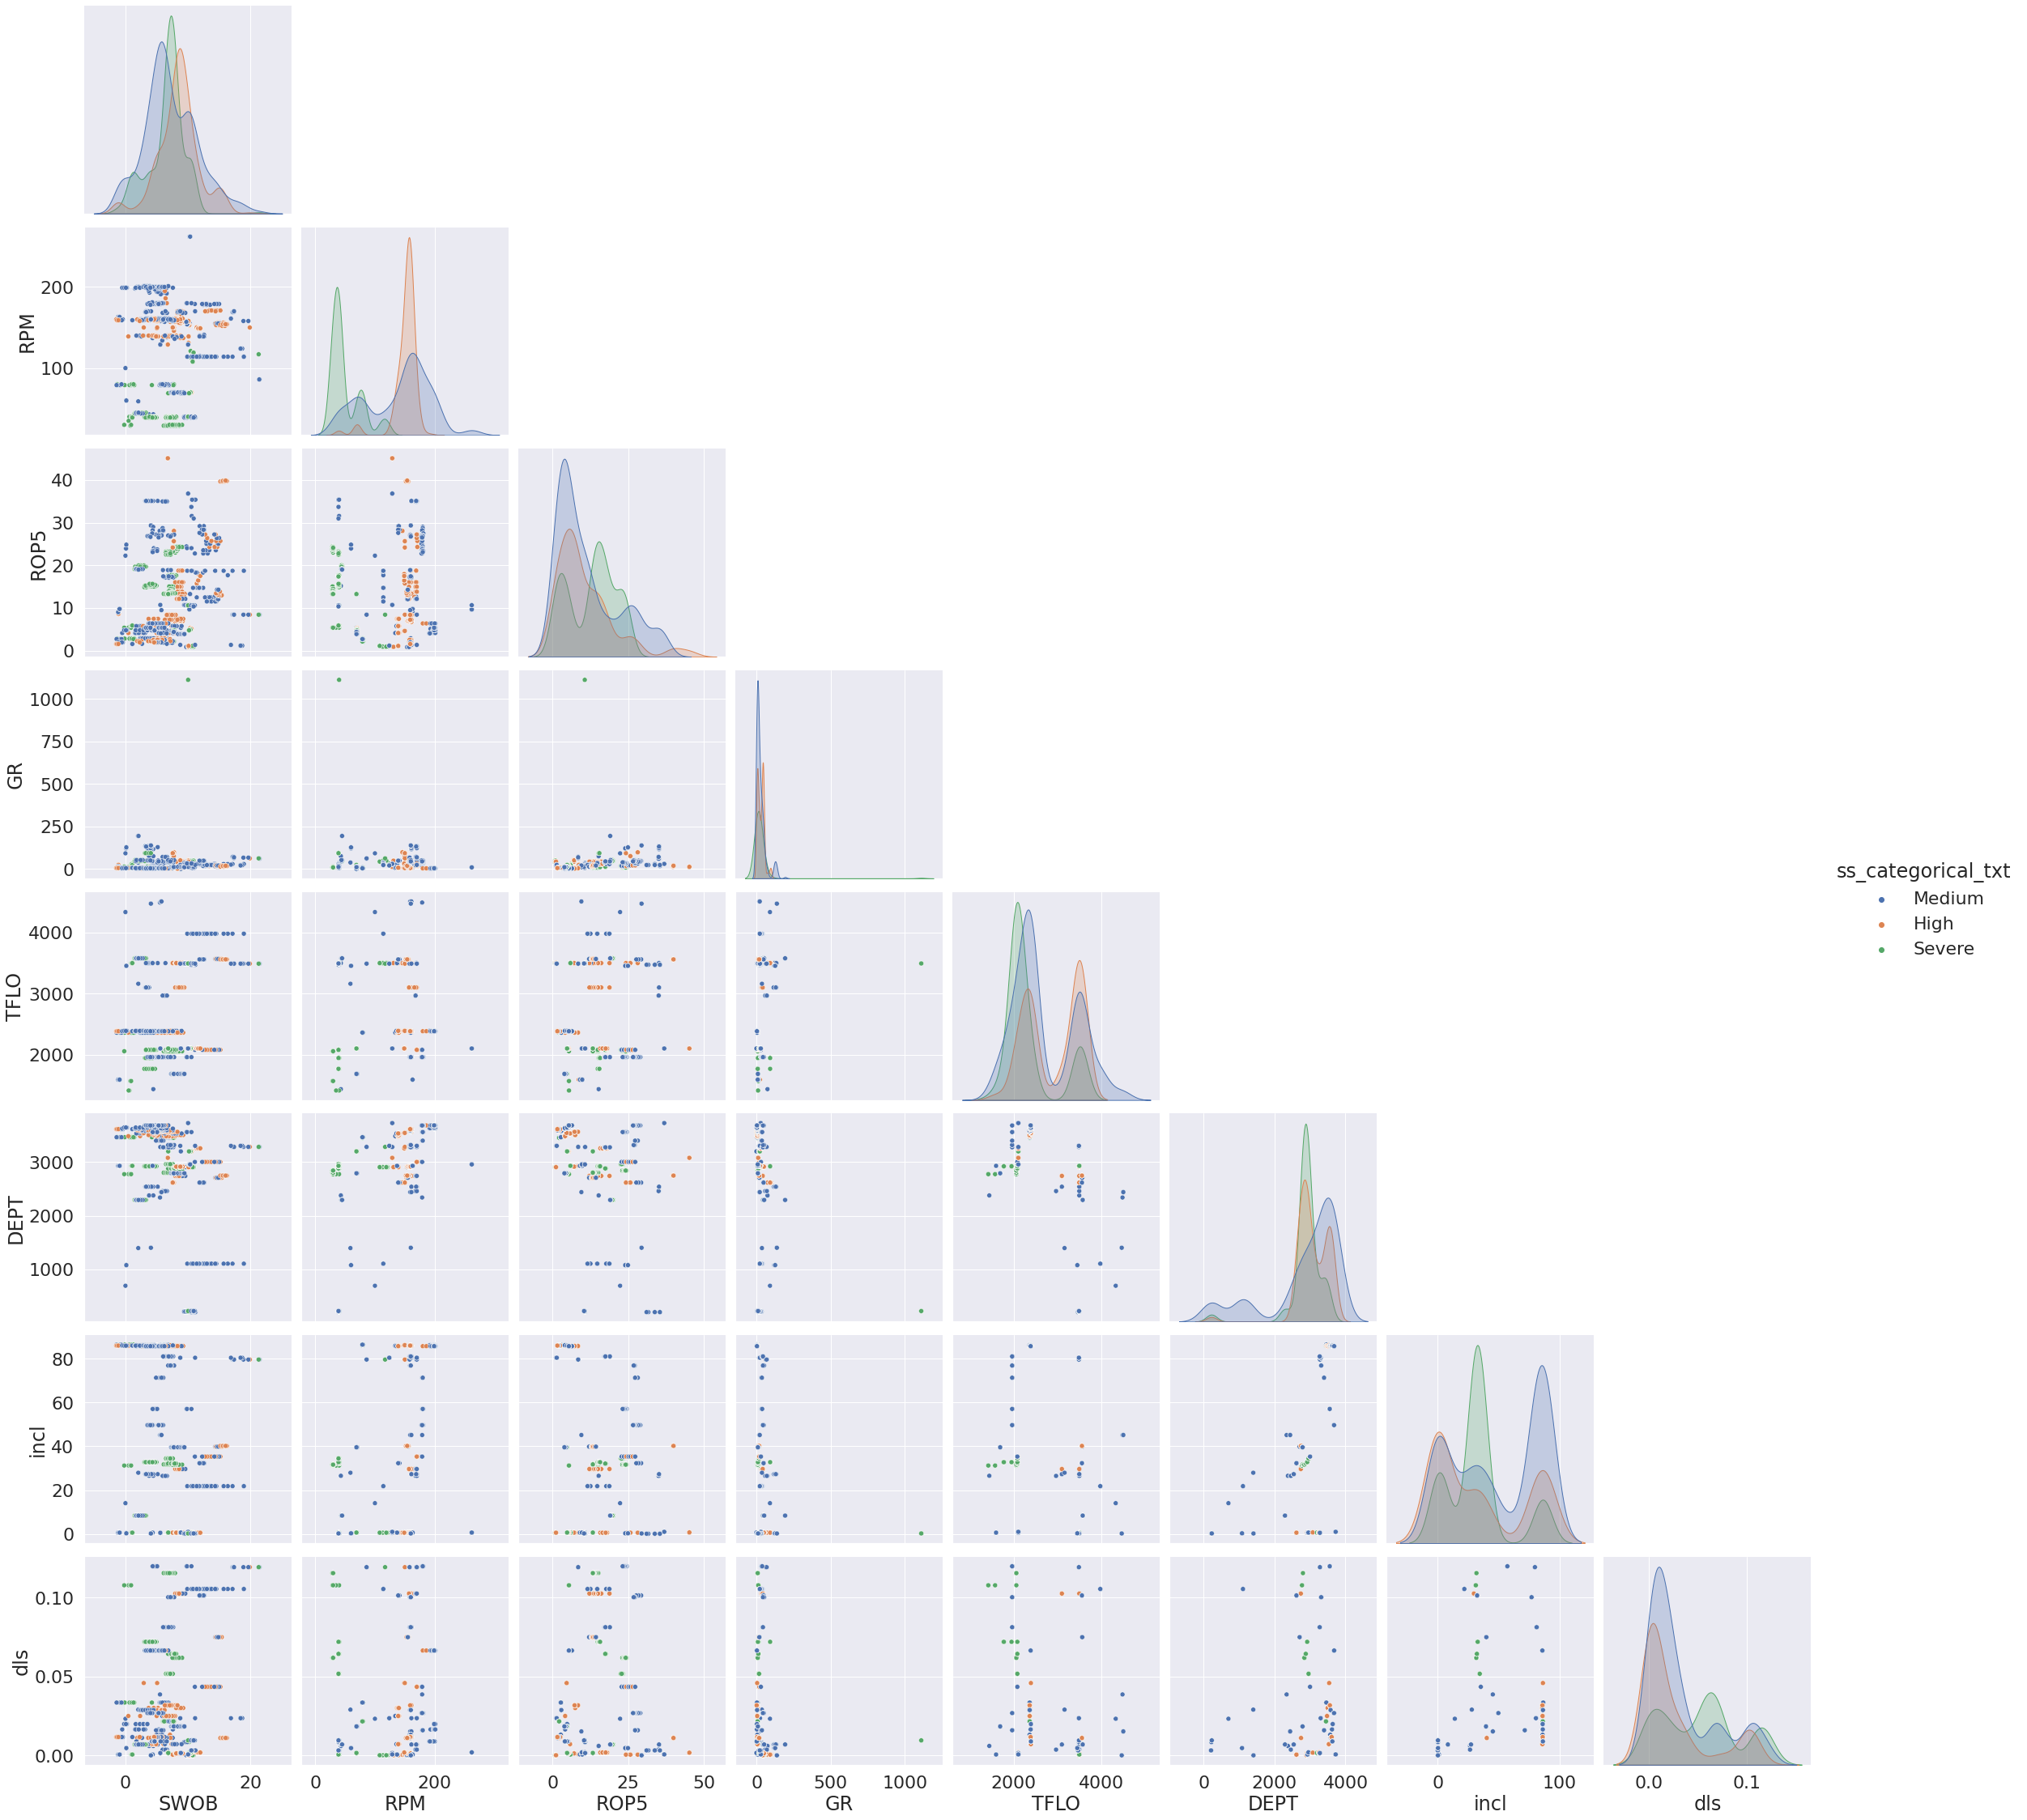

In [45]:
%%time
sns.set(font_scale=2)
sns.pairplot(df_ss.drop(df_ss.loc[df_ss['ss_categorical_txt']=="None or Low"].index), hue='ss_categorical_txt',height=4,vars=["SWOB","RPM","ROP5","GR","TFLO","DEPT","incl","dls"],
             diag_kind = 'kde',corner=True)

CPU times: user 1min 8s, sys: 799 ms, total: 1min 9s
Wall time: 1min 9s


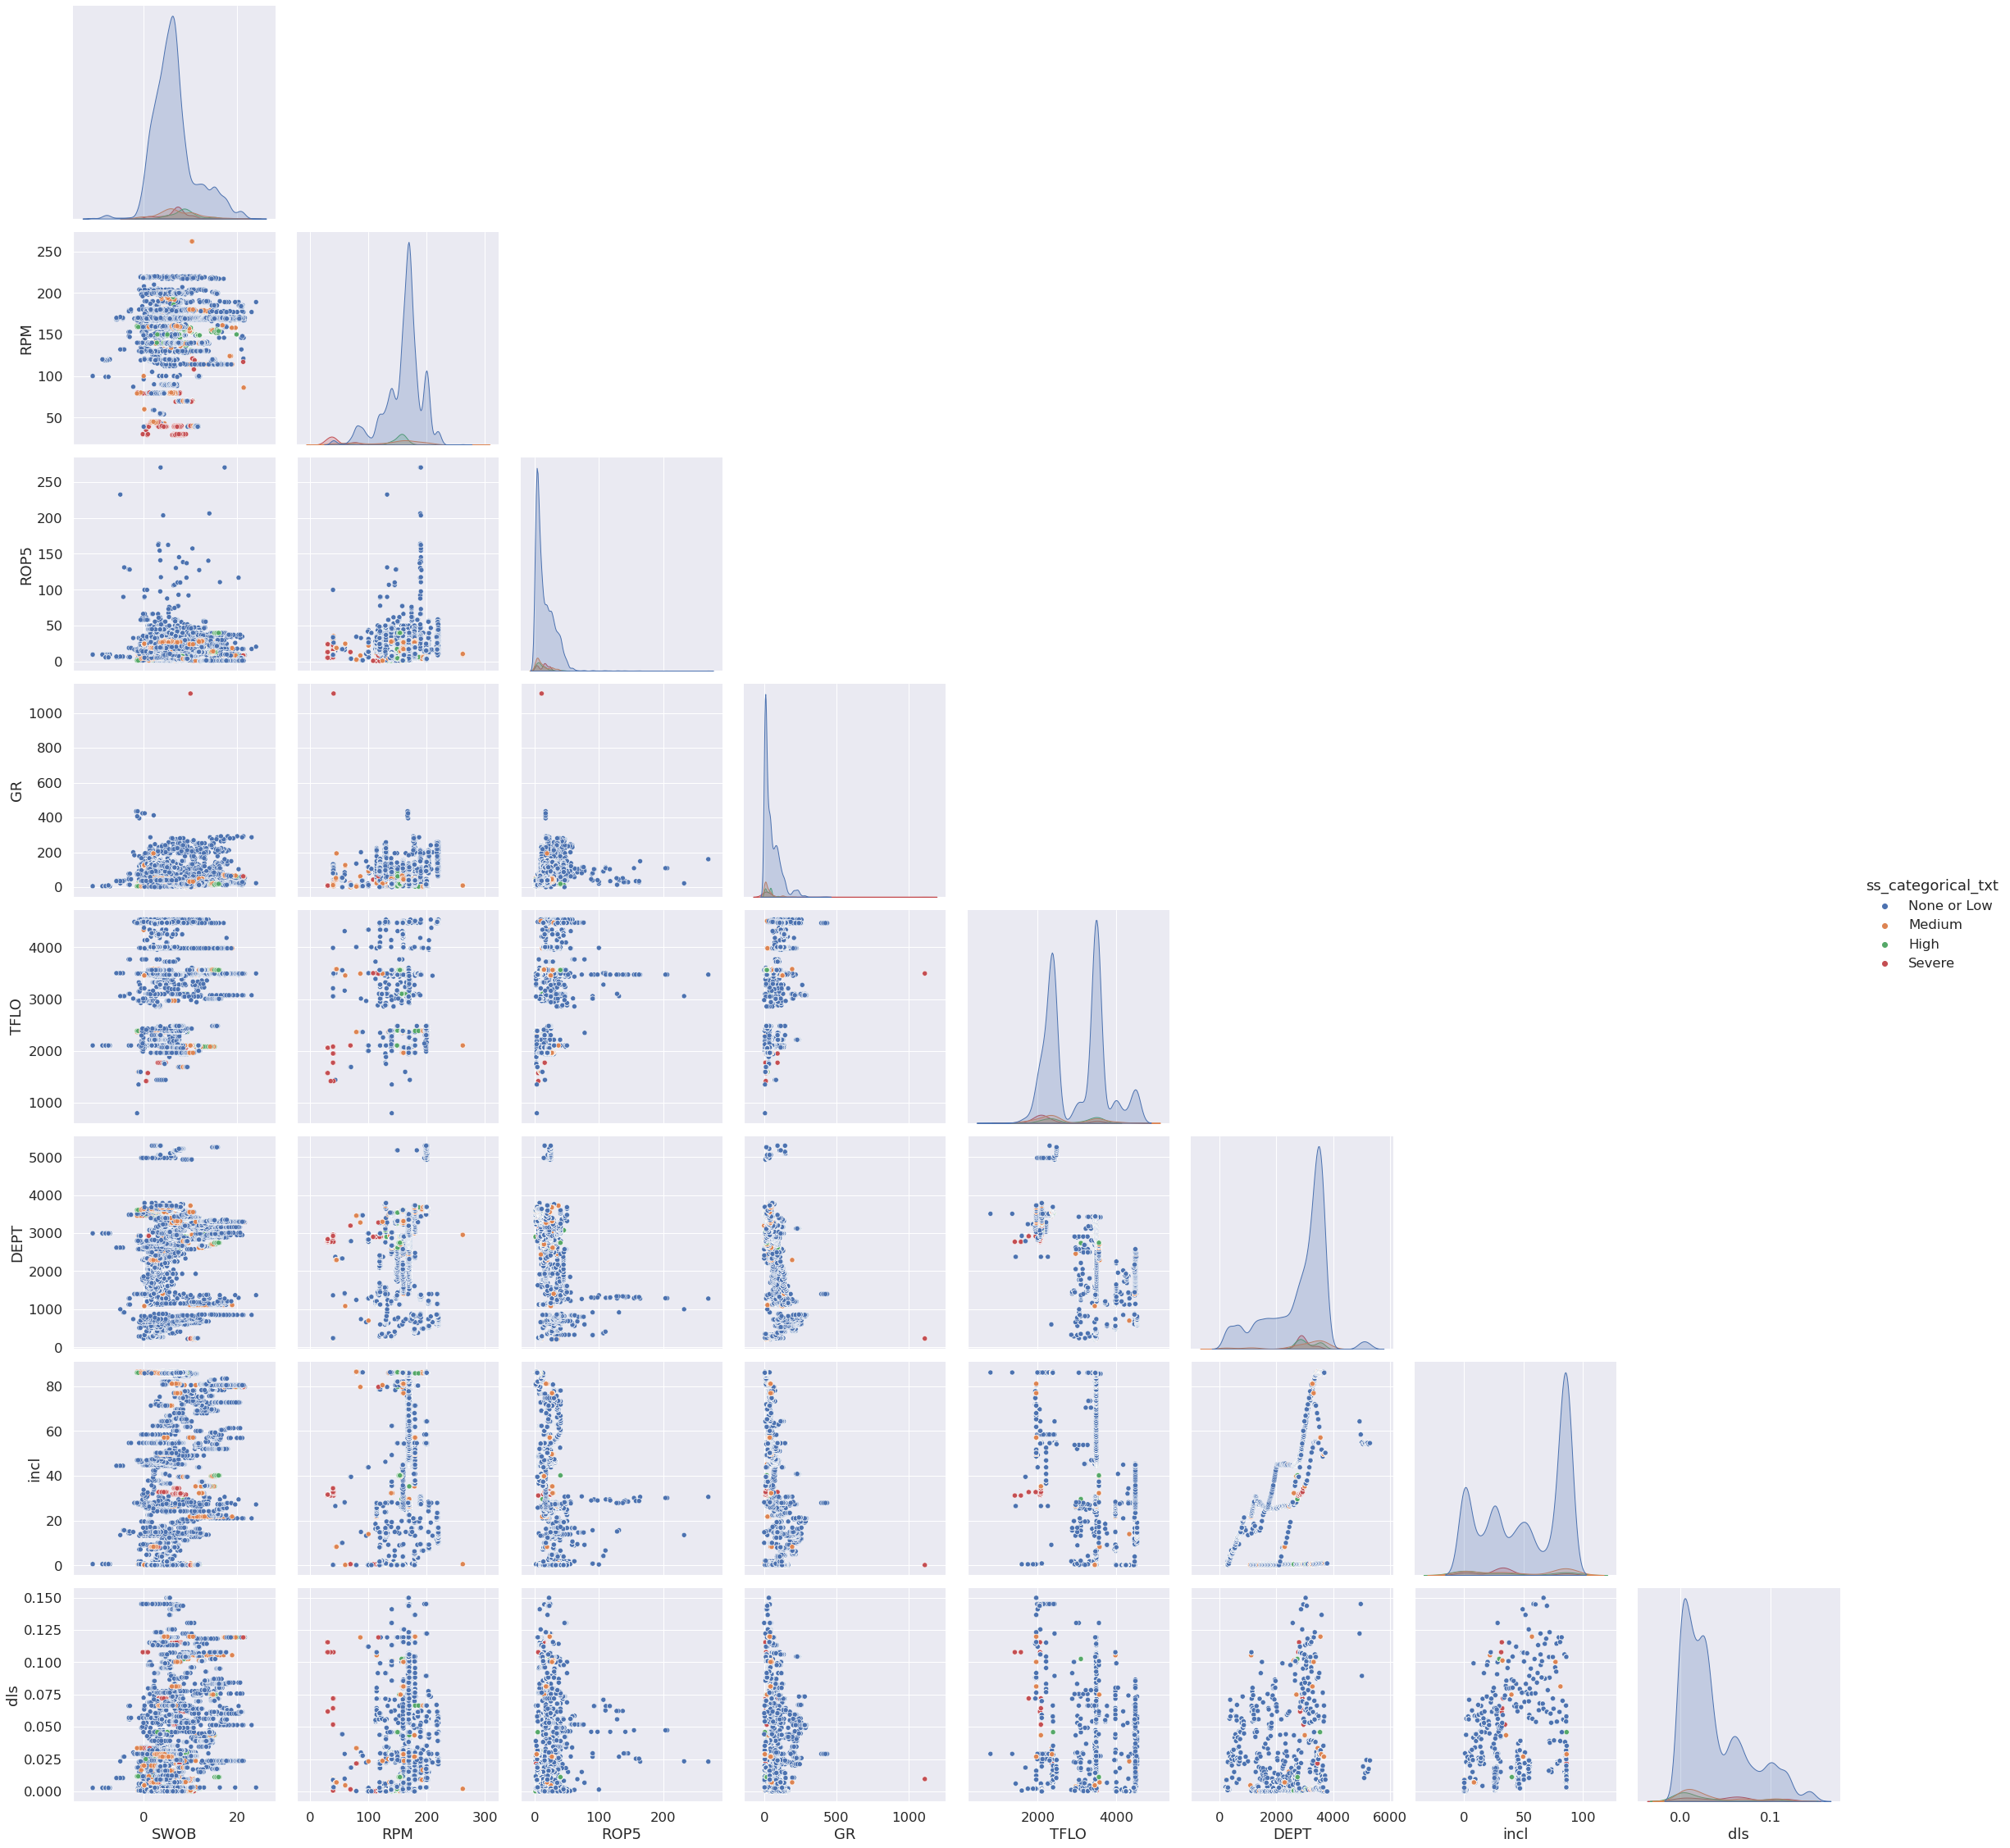

In [28]:
%%time
sns.pairplot(df_ss.dropna(), hue='ss_categorical_txt',height=4,vars=["SWOB","RPM","ROP5","GR","TFLO","DEPT","incl","dls"],
             diag_kind = 'kde',corner=True)

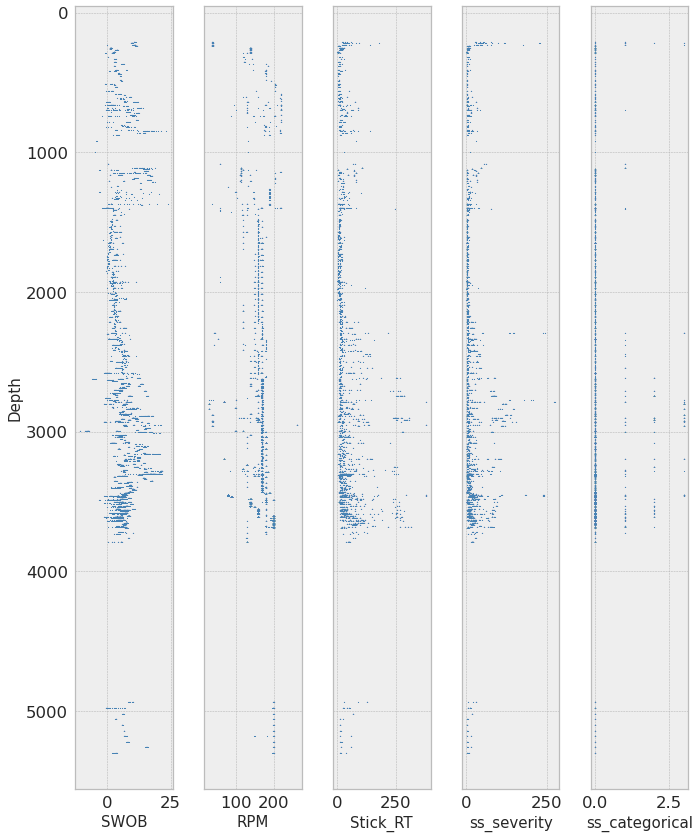

In [44]:
sc.depth_plts(df_mod,["SWOB","RPM","Stick_RT","ss_severity","ss_categorical"])

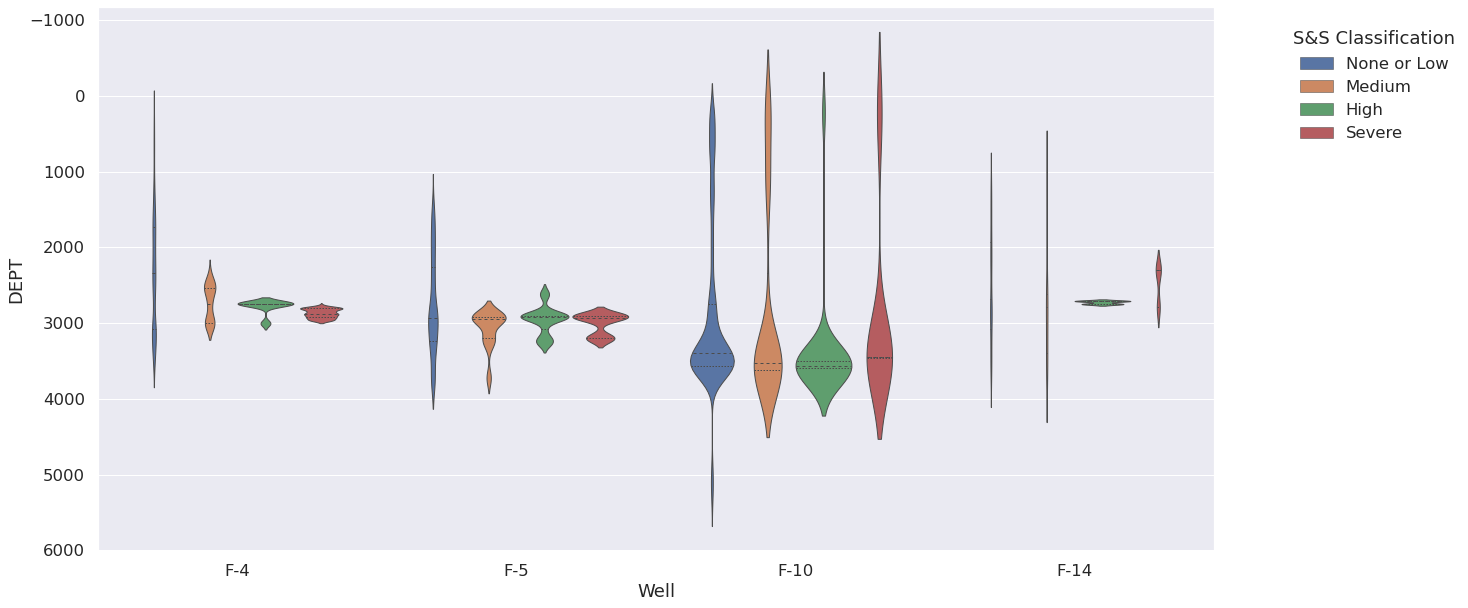

In [46]:
sns.set(font_scale=1.5)
plt.figure(figsize=(20,10))
sns.violinplot(data=(df_mod.drop(["DateTime"],axis=1)), x="Well", y="DEPT", hue="ss_categorical_txt",inner="quart", linewidth=1)
plt.gca().invert_yaxis()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=1,title="S&S Classification")
#sns.despine(left=True)

In [ ]:
df_mod.columns

<Figure size 720x432 with 0 Axes>

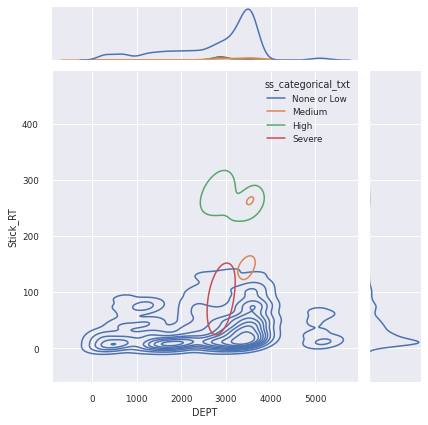

CPU times: user 25.3 s, sys: 152 ms, total: 25.4 s
Wall time: 24.7 s


In [47]:
%%time
sns.set(font_scale=.8)
plt.figure(figsize=(10,6))
sns.jointplot(data=df_mod,x='DEPT',y="Stick_RT",hue="ss_categorical_txt",kind='kde')
plt.show()

<Figure size 720x432 with 0 Axes>

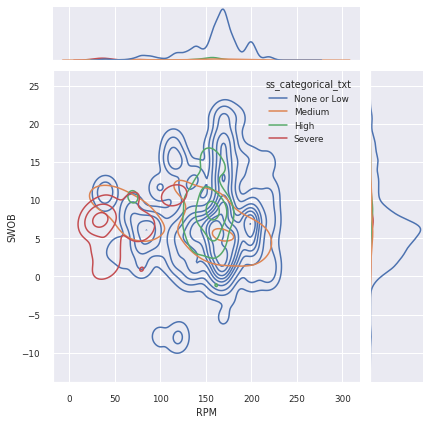

CPU times: user 25.2 s, sys: 258 ms, total: 25.5 s
Wall time: 24.6 s


In [49]:
%%time
sns.set(font_scale=.8)
plt.figure(figsize=(10,6))
sns.jointplot(data=df_mod,x='RPM',y="SWOB",hue="ss_categorical_txt",kind='kde')
plt.show()

In [51]:
df_mod.to_csv(r"TrainingVss_Inc.csv",index=False)